<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Group Assignment</strong></h1>
<h2 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Occupancy Estimation</strong></h2>

### <b>Group 10</b>
### <b>Student Name: Nguyen Dang Huynh Chau (s3777214)</b>
### <b>Student Name: Truong Phu Khang ()</b>
### <b>Student Name: </b>
### <b>Student Name: </b>
### <b>Student Name: </b>

### <b>Course: EEET2485 - Research Method for Engineers</b>
### <b>Lecturer: Dr. Dao Vu Truong Son</b>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Introduction](#1.1) 

1.2 [Target question for insights](#1.2)

1.3 [Importing Necessary Libraries and datasets](#1.3)

1.4 [Data Retrieving](#1.4)

1.5 [Data information](#1.5)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Data preprocessing](#2.2)

> - 2.2.1 [Drop column `ID` and `Insurance`](#2.2.1)
> - 2.2.2 [Rename column `Sepssis`](#2.2.2)  
> - 2.2.3 [Convert `Sepsis` in to binary number](#2.2.3)
> - 2.2.4 [Drop Duplicate](#2.2.4)  
> - 2.2.5 [Convert Data Type](#2.2.5)  

2.3 [Drop column](#2.3)

> - 2.3.1 [Check correllation for dropping](#2.3.1)
> - 2.3.2 [Check missing values for dropping](#2.3.2)  

2.4 [Upper Case the content](#2.4)

2.5 [Extra-whitespaces](#2.5)

2.6 [Descriptive statistics for Central Tendency](#2.6)

> - 2.6.1 [Overview statistics](#2.6.1)
> - 2.6.2 [Domain Knowledge](#2.6.2)  
> - 2.6.3 [Detect Outliers](#2.6.2)  

2.7 [Save The Intermediate Data](#2.8)

<br>

### 3. [Data exploration (EDA)](#3)

3.1 [Overall look on target variable](#3.1)

> - 3.1.1 [Distribution of Sepsis](#3.1.1) 
> - 3.1.2 [Proportion of Sepsis](#3.1.1) 

3.2 [Frequency of each corresponiding Target variable type](#3.2)

> - 3.2.1 [How old are they?](#3.2.1) 
> - 3.2.2 [How much they weight?](#3.2.2) 
> - 3.2.3 [How high PL (Blood Work Result-1 (mu U/ml)) that the Sepsis is likely to get?](#3.2.3) 
> - 3.2.4 [How high PR ((Blood Pressure (mm Hg)) that the Sepsis is likely to get?](#3.2.4) 
> - 3.2.5 [How high SK (Blood Work Result-2 (mm) that the Sepsis is likely to get?](#3.2.5) 
> - 3.2.6 [How high TS (Blood Work Result-3 (mu U/ml)) that the Sepsis is likely to get?](#3.2.6) 
> - 3.2.7 [How high BD2 (Blood Work Result-4 (mu U/ml)) that the Sepsis is likely to get?](#3.2.7) 
> - 3.2.8 [How high BD2 (Blood Work Result-4 (mu U/ml)) that the Sepsis is likely to get?](#3.2.8) 
> - 3.2.9 [Scatter matrix](#3.2.8) 

3.3 [Statistical Test for Correlation](#3.3)

3.4 [Summary](#3.3)

<br>

### 4. [Feature Engineering](#4)

4.1 [Class Imbalancing](#4.1)

4.2 [Splitting the training data](#4.2)

4.3 [Feature Scaling](#4.3)



<br>

### 5. [Model Building](#5) 

5.1 [Logistic Regression](#5.1)

> - 5.1.1 [Train Model](#5.1.1)
> - 5.1.2 [Model Evaluation](#5.1.2)
> - 5.1.3 [Hypertuning parameter](#5.1.3)
> - 5.1.4 [Retrain](#5.1.4)
> - 5.1.5 [Conclusion](#5.1.5)

5.2 [Decision Tree](#5.2)

> - 5.2.1 [Train Model](#5.2.1)
> - 5.2.2 [Hypertuning & Pruning](#5.2.2)

> - 5.2.2.a [Post-Pruning](#5.2.2.a)
> - 5.2.2.b [Pre-Pruning](#5.2.2.b)
> - 5.2.2.c [Hypertuning parameter](#5.2.2.c)

> - 5.2.3 [Hypertuning parameter](#5.2.3)
> - 5.2.4 [Conclusion](#5.2.3)

5.3 [Random Forest](#5.3)

> - 5.3.1 [Train Model](#5.3.1)
> - 5.3.2 [Model Evaluation](#5.3.2)
> - 5.3.3 [Hypertuning parameter](#5.3.3)
> - 5.3.4 [Retrain](#5.3.4)
> - 5.3.5 [Conclusion](#5.3.5)

<br>

### 6. [Conculsions](#5)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ️🎯 1.1 Introduction
****

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> This is for introduction.</p>

## 📣 What will you get after this notebook?

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Factors that reflect </li>
</ul>

<a id="1.2"></a>
# ️🎯 1.2 Target question for insights
****
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Which <span style="color:#122ecc;">Time </span> the <span style="color:#122ecc;">temperature, light, sound, CO2 and digital passive infrared (PIR) </span> reach the highest values?</li>

</ul>

<a id="1.3"></a>
# ✴️ 1.3 Importing Necessary Libraries and datasets
****

In [1]:
import sys
!{sys.executable} -m pip -q install missingno
!{sys.executable} -m pip -q install graphviz
!{sys.executable} -m pip -q install researchpy
!{sys.executable} -m pip -q install imbalanced-learn

# import libraries which are pandas and numpy
import pandas as pd
import numpy as np
import missingno as msno


#for plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= 15,10

#Libraries for plotting
# Modules for data visualization
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_theme(style="ticks", color_codes=True) #set theme in seaborn
# scatter matrix library
from pandas.plotting import scatter_matrix

## Check numpy and pandas version

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.22.3
Pandas version:  1.3.4
Python 3.9.7


### ------------> OBSERVATION
***
I want to check the numpy and pandas version since I want to make sure the verson is appropriate for my work load. Currently, it is still appropriate

<a id="1.4"></a>
# 📲 1.4 Data Retrieving
***


In [3]:
df = pd.read_csv("Data/accelerometer.csv", delimiter=',', skipinitialspace = True)

df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

# drop Unnamed, it is just a number given to identify each house
df.head(3)

The shape of the ORGINAL data is (row, column): (153000, 5)


,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121


<a id="1.5"></a>
# 🔈 1.5 Data Information
****
I want to have an overall look on both of the train and test dataset, so I use .shape and .info() function in python to do that.

In [4]:
print ("The shape of the train data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the train data is (row, column):(153000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB
None


### ------------> OBSERVATION
***
From this, the information that I gained from the train dataset are the total record is 10129 with no missing and it has 19 columns with the target variable `Room_Occupancy_Count.

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***
**Categorical:** 
            
- **Ordinal** (just like nominal datatype but can be ordered or ranked)
> - **wconfid** Weight Configuration ID (1 - 'red' - normal configuration; 2 - 'blue' - perpendicular configuration; 3 - 'green' - opposite configuration)

***
**Numeric:**
- **Discrete**
>  - **pctid** : Cooler Fan RPM Speed Percentage ID (20 means 20%, and so on).
  
- **Continous**
    >  - **x** Accelerometer x value.
    >  - **y** Accelerometer y value.
    >  - **z** Accelerometer z value.

<a id="2.2"></a>
# 🦄 2.2 Drop duplicate
***
Firstly, we want to drop duplicate

In [5]:
print ("The shape of the data set before dropping duplicated:"+ str(df.shape))

df = df.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(df.shape))

The shape of the data set before dropping duplicated:(153000, 5)
The shape of the data set after dropping duplicated:(146214, 5)


<a id="2.3"></a>
# ❌ 2.3 Descriptive statistics for Central Tendency
***
I want to check and validate of the numerical columns:

1. Check overview statistics:
2. Check the scale
3. Check outliers

<a id="2.3.1"></a>
## 2.3.1 Overview statistics
***

In [6]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wconfid,146214.0,1.985521,0.814731,1.000,1.000,2.000,3.000,3.000
pctid,146214.0,61.279084,24.133076,20.000,40.000,60.000,80.000,100.000
x,146214.0,0.995664,0.791695,-8.000,0.941,0.992,1.043,7.996
y,146214.0,0.005425,0.759508,-8.000,-0.082,0.012,0.109,7.996
z,146214.0,-0.117454,0.528834,-5.867,-0.180,-0.125,-0.059,6.086


## Check the correlation of all features:

/var/folders/l5/0ygc5m0x66xc7d4v2qzjjv0h0000gn/T/ipykernel_72412/2733726890.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


Text(0.5, 1.03, 'Correlations Among Features')

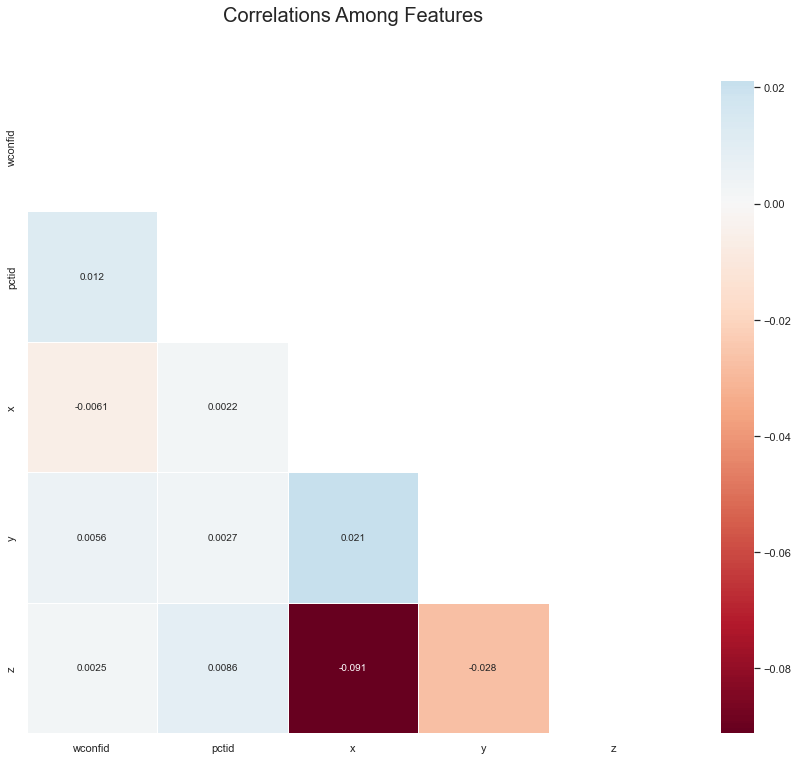

In [7]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), annot=True, mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, linecolor='white', fmt='.2g', center = 0, square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40)

### ------------> OBSERVATION
***

In [8]:
df['pctid'].value_counts()

95     8994
90     8992
85     8990
100    8982
80     8980
75     8960
65     8884
70     8882
60     8843
55     8825
50     8812
45     8681
40     8550
35     8275
30     7671
25     7477
20     7416
Name: pctid, dtype: int64

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data exploration (EDA)</strong></h1>

## Function for box plot visualization

In [9]:
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
def plot_box(dataset, x, y, xlabel, ylabel, title, subtitle, color, title_position, subtitle_position, order=None):
    ax = sns.boxplot(data = dataset, y = y, x = x, order = order,
                 linewidth = 1.2, color = color, **PROPS,
                 flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 6.5, linestyle = 'none', markerfacecolor = color, alpha = 0.9))

    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.tick_params(labelsize = 14)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)
    ax.text(x = subtitle_position, y = 1.03, s = subtitle, fontsize = 16.5, alpha = 0.75, ha = 'center', va = 'bottom', transform = ax.transAxes)
    plt.show()

<a id="3.1"></a>
# 3.1 Overall look on target variable

<a id="3.1.1"></a>
## 3.1.1 Distribution of Sepsis

In [10]:
# sns.displot(train, x="Survived", hue="Pclass", kind="kde", fill=True)
plot = sns.displot(train, x="Sepsis", kind="kde", fill=True, color='blue', height= 14)

plot.fig.suptitle("Distribution of Sepsis", fontsize=25, y=1.08, fontweight = 'bold')
plot.set_xlabels("Sepsis", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Density", fontsize = 20, fontweight = 'bold')

NameError: name 'train' is not defined

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>It is a <span style="color:#122ecc;">bionormal distribution</span></li> 
    <li>Suprisingly, <span style="color:#122ecc;">more</span> people <span style="color:#122ecc;">don't have Sepsis</span>.</li>
</ul>
</div>

<a id="3.1.2"></a>
## 3.1.2 Proportion of Sepsis

In [ ]:
# Pie chart
labels = ['Sepsis', 'Not Sepsis']
#colors
colors = ['#94B3FD', '#F9C5D5']
ax = plt.pie(train['Sepsis'].value_counts(), labeldistance=1.15, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 16});
plt.title('Proportion of Sepsis', fontsize=25, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>It is This plots compares the proportion of people having sepsis to the people not having sepsis</li> 
    <li>Suprisingly, <span style="color:#122ecc;">more than a half of</span> people (64.9%) <span style="color:#122ecc;">don't have Sepsis</span>.</li>
    <li>Contrarily, <span style="color:#122ecc;">just over 35% </span>  people <span style="color:#122ecc;">don't have Sepsis</span>.</li>
</ul>
</div>

<a id="3.2"></a>
# 3.2 Frequency of each corresponiding Target variable type
****


<a id="3.2.1"></a>
## 3.2.1 How old are they?
****

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
sns.set(style="darkgrid")
ax=sns.kdeplot(train.loc[(train['Sepsis'] == 1),'Age'] , color='gray',shade=True)
ax=sns.kdeplot(train.loc[(train['Sepsis'] == 0),'Age'] , color='g',shade=True)
plt.title('How old the people having sepsis are?', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Patient", fontsize = 15, labelpad = 20)
plt.xlabel("Age", fontsize = 15, labelpad = 20)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>In this chart, the green is for the people not having Sepsis, and the people who have Sepsis is the gray one.</li>
    <li>As expected, the <span style="color:#122ecc;">older people</span> tend to have higher chance to have Sepsis than younger people. </li> 
    <li>In the <span style="color:#122ecc;">the 30s or older</span>, people have higher probability to have Sepsis</li>
</ul>
</div>

<a id="3.2.2"></a>
## 3.2.2 How much they weight?
****

In [ ]:
plot_box(train, x = "Sepsis", y = "M11", xlabel = 'Sepsis', ylabel = "M11", title = "How many people have sepsis are overweight?",
         subtitle = "Distributions, boxplots", color = "lightskyblue", title_position = 0.22, subtitle_position = 0.112)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>As expected, people having <span style="color:#122ecc;">higher</span> Body Mass Index tend to have higher chance to have Sepsis. </li>
    <li>The average of body mass index that people having Sepsis is <span style="color:#122ecc;">over 35kg/m^2.</span> </li> 
</ul>
</div>

<a id="3.2.3"></a>
## 3.2.3 How high PL (Blood Work Result-1 (mu U/ml)) that the Sepsis is likely to get?
****

In [ ]:
plt.subplots(figsize = (15,10))

sns.barplot(x = "Sepsis", y = "PL", data=train, linewidth=6, capsize = .05, errcolor='blue', errwidth = 3)
plt.title("How high PL (Blood Work Result-1 (mu U/ml)) that the Sepsis is likely to get?", fontsize = 25, fontweight = 'bold', pad=40)
plt.xlabel("Sepsis", fontsize = 15, fontweight = 'bold')
plt.ylabel("PL", fontsize = 15, fontweight = 'bold')
names = ['Negative', 'Possitive']
#val = sorted(train.Pclass.unique())
val = [0,1] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>As expected, people having <span style="color:#122ecc;">higher</span> PL (Blood Work Result-1 (mu U/ml)) tend to have higher chance to have Sepsis. </li>
    <li>The average of PL (Blood Work Result-1 (mu U/ml)) that people having Sepsis is <span style="color:#122ecc;">higher than 140</span> while people not have Sepsis have the average PL is around 100</li> 
</ul>
</div>

<a id="3.2.4"></a>
## 3.2.4 How high PR ((Blood Pressure (mm Hg)) that the Sepsis is likely to get?
****

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
sns.set(style="darkgrid")
ax=sns.kdeplot(train.loc[(train['Sepsis'] == 1),'PR'] , color='gray',shade=True)
ax=sns.kdeplot(train.loc[(train['Sepsis'] == 0),'PR'] , color='g',shade=True)
plt.title('How high PR ((Blood Pressure (mm Hg)) that the Sepsis is likely to get?', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Patient", fontsize = 15, labelpad = 20)
plt.xlabel("PR", fontsize = 15, labelpad = 20)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>As expected, people having <span style="color:#122ecc;">higher</span> PR ((Blood Pressure (mm Hg) tend to have higher chance to have Sepsis. </li>
    <li>The level of PR ((Blood Pressure (mm Hg) that people having Sepsis likely to have is <span style="color:#122ecc;">higher than 80</span></li> 
</ul>
</div>

<a id="3.2.5"></a>
## 3.2.5 How high SK (Blood Work Result-2 (mm) that the Sepsis is likely to get?
****

In [ ]:
plot_box(train, x = "Sepsis", y = "SK", xlabel = 'Sepsis', ylabel = "SK", title = "How high SK (Blood Work Result-2 (mm) that the Sepsis is likely to get?",
         subtitle = "Distributions, boxplots", color = "lightskyblue", title_position = 0.22, subtitle_position = 0.112)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>As expected, people having <span style="color:#122ecc;">higher</span> SK (Blood Work Result-2 (mm) tend to have higher chance to have Sepsis. </li>
    <li>The average of SK (Blood Work Result-2 (mm)) that people having Sepsis is <span style="color:#122ecc;">higher than 30</span> while people not have Sepsis have the average SK is around 20</li> 
</ul>
</div>

<a id="3.2.6"></a>
## 3.2.6 How high TS (Blood Work Result-3 (mu U/ml)) that the Sepsis is likely to get?
****

In [ ]:
sns.factorplot(x =  "Sepsis", y = "TS", data = train,kind = "point",size = 8)
plt.title('How high TS (Blood Work Result-3 (mu U/ml)) that the Sepsis is likely to get?', fontsize = 25)
plt.subplots_adjust(top=0.85)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>As expected, people having <span style="color:#122ecc;">higher</span> TS (Blood Work Result-3 (mu U/ml)) tend to have higher chance to have Sepsis. </li>
    <li>The average of TS (Blood Work Result-3 (mu U/ml)) that people having Sepsis is <span style="color:#122ecc;">higher than 110</span> while people not have Sepsis have the average TS is lower than 70</li> 
</ul>
</div>

<a id="3.2.7"></a>
## 3.2.7 How high BD2 (Blood Work Result-4 (mu U/ml)) that the Sepsis is likely to get?
****

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
sns.set(style="darkgrid")
ax=sns.kdeplot(train.loc[(train['Sepsis'] == 1),'BD2'] , color='gray',shade=True)
ax=sns.kdeplot(train.loc[(train['Sepsis'] == 0),'BD2'] , color='g',shade=True)
plt.title('How high BD2 (Blood Work Result-4 (mu U/ml)) that the Sepsis is likely to get?', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Patient", fontsize = 15, labelpad = 20)
plt.xlabel("BD2", fontsize = 15, labelpad = 20)


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>As expected, people having <span style="color:#122ecc;">higher</span> BD2 (Blood Work Result-4 (mu U/ml)) tend to have higher chance to have Sepsis. </li>
    <li>The level of BD2 (Blood Work Result-4 (mu U/ml)) that people having Sepsis likely to have is <span style="color:#122ecc;">higher than 0.5</span></li> 
</ul>
</div>

<a id="3.2.8"></a>
## 3.2.8 How high BD2 (Blood Work Result-4 (mu U/ml)) that the Sepsis is likely to get?
****

In [ ]:
plot_box(train, x = "Sepsis", y = "PRG", xlabel = 'Sepsis', ylabel = "PRG", title = "How high Plasma glucose that the Sepsis is likely to get?",
         subtitle = "Distributions, boxplots", color = "lightskyblue", title_position = 0.22, subtitle_position = 0.112)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>As expected, people having <span style="color:#122ecc;">higher</span> BD2 (Blood Work Result-4 (mu U/ml)) tend to have higher chance to have Sepsis. </li>
    <li>The level of BD2 (Blood Work Result-4 (mu U/ml)) that people having Sepsis likely to have is <span style="color:#122ecc;">higher than 0.5</span></li> 
</ul>
</div>

<a id="3.2.9"></a>
## 3.2.9 Scatter matrix
****

In [ ]:
scatter_matrix(train,alpha=0.2,figsize=(10,10),diagonal='hist')

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Only <span style="color:#122ecc;">PL, PR and M1</span> features have nearly normal distribution</li>
    <li>The feature <span style="color:#122ecc;">SK, TS, BD2 and Age</span> have skewed right distribution</li>
</ul>
</div>

<a id="3.3"></a>
# 3.3 Statistical Test for Correlation
****
> **Null Hypothesis($H_0$):**  people having sepsis have equal medical statistic to people not having sepsis.  
>  **Alternative Hypothesis($H_A$):** people having sepsis have higher medical statistic to people not having sepsis. 
****
## Select 2 sub dataset

In [ ]:
sepsis = train[train['Sepsis'] == 1]
not_sepsis = train[train['Sepsis'] == 0]

## Overall describe by group by

In [ ]:
train.groupby('Sepsis').describe()

### ---------> OBSERVATION
****
Overall, the people having sepsis tend to have higher medical statistic than people who do not have sepsis. However, I still want to have a statistical test for proving this is true.

## Calculate P-values

In [ ]:
import researchpy as rp
import scipy.stats as stats

stats.ttest_ind(train[['Age', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2']][train['Sepsis'] == 1],
                train[['Age', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2']][train['Sepsis'] == 0])

### ---------> OBSERVATION
****
The p-values is not high enough so we can remove the null hypothesis ($H_0$). Since then, the higher the medical statistic the higher chance the paitent can get sepsis. That is also the reason why I do not want to drop outliers.

## 🚩 Reason why I do not drop outliers:
> - The higher the medical statistic is the higher chance the paitent can get sepsis.
> - The my data set is extremely small, so, if I drop outliers then tha train process only have a considerably small dataset and it cannot "study" properly for every cases.


<a id="3.4"></a>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=14dpaeXX-ajsM8quwe3dCCdQdrdvf29iI" align="left" hspace="20px" vspace="20px" width="45" height="60" ></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">3.4 Summary</li>
</ul>
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
    <br>
    
*******
    
<li>1. Suprisingly, <span style="color:#122ecc;">more</span> people <span style="color:#122ecc;">don't have Sepsis</span>.</li>
<br>
<li>2. In the <span style="color:#122ecc;">the 30s or older</span>, people have higher probability to have Sepsis</li>
<br>
<li>3. The higher the body mass index is the higher chance that pantient can get Sepsis. The average of body mass index that people having Sepsis is <span style="color:#122ecc;">over 35kg/m^2.</span> </li>
<br>
<li>4. The higher the PL is the higher chance that pantient can get Sepsis. The average of PL (Blood Work Result-1 (mu U/ml)) that people having Sepsis is <span style="color:#122ecc;">higher than 140</span> while people not have Sepsis have the average PL is around 100</li>
<br>
<li>5. The higher the PR is the higher chance that pantient can get Sepsis. The level of PR ((Blood Pressure (mm Hg) that people having Sepsis likely to have is <span style="color:#122ecc;">higher than 80</span> </li>
<br>
<li>6. The higher the SK is the higher chance that pantient can get Sepsis. The average of SK (Blood Work Result-2 (mm)) that people having Sepsis is <span style="color:#122ecc;">higher than 30</span> while people not have Sepsis have the average SK is around 20 </li>
<br>
<li>7. The higher the TS is the higher chance that pantient can get Sepsis. The average of TS (Blood Work Result-3 (mu U/ml)) that people having Sepsis is <span style="color:#122ecc;">higher than 110</span> while people not have Sepsis have the average TS is lower than 70 </li>
<br>
<li>8. The higher the TS is the higher chance that pantient can get Sepsis. The level of BD2 (Blood Work Result-4 (mu U/ml)) that people having Sepsis likely to have is <span style="color:#122ecc;">higher than 0.5 </span> </li>
    
</ul>

### ------------> OBSERVATION
*****
There is a large overfitting. However, the accuracy is not high as expected, so I will have pruning process and hyperparameter tuning process to make the accuracy equal.

## Plot The Decision Tree
****

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'],  
                   class_names=['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'],
                   filled=True)

<a id="5.2.2"></a>
## 5.2.2 Hyperparameter tuning & Pruning:
****
> - Hyperparameter tuning is for finding the most optimised parameter for my model.
> - Pruning is for minimise the overfitting problem.

## Feature importance for this decision tree:
***
This one is for selecting the values for the max_feature to train later

In [ ]:
column_names = X.columns
## feature importance
feature_importances = pd.DataFrame(clf.feature_importances_, index = column_names, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

In [ ]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(['SK', 'PRG', 'TS', 'Age', 'PR', 'BD2', 'M11', 'PL'], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### ------------> OBSERVATION
****
In this decision tree, **PL, M11 and BD2** are three main important feature for classifying the sepsis and not sepsis patient. 

<a id="5.2.2.a"></a>
## 5.2.2.a Post Pruning:
****

In [ ]:
path=clf.cost_complexity_pruning_path(X_train,y_train)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha will give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

In [ ]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,
                                                                                  ccp_alphas[-1]))

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

### ------------> OBSERVATION
****
According to this plot the plot, the ccp_alpha that has the nearly equal train and test set is at 0.00899989.

## Retrain the model with ccp_alpha
***

In [ ]:
# Initialise the model
clf=DecisionTreeClassifier(random_state=42,ccp_alpha=0.00899989)

# Fit the model with train set
clf.fit(X_train,y_train)

## Use the "X_train" to predict the model outcome -> evaluate the outcome of model in train set.
y_train_predicted = clf.predict(X_train)

## Use the "X_test" to predict the model outcome -> evaluate the outcome of model.
y_test_predicted = clf.predict(X_test)

In [ ]:
## Check if the model is overfitting or not?
from sklearn.metrics import f1_score, accuracy_score
print("Test F1 Score:" + str(f1_score(y_test, y_test_predicted)))
print("Test Accuracy Score:" + str(accuracy_score (y_test, y_test_predicted)))
print("--------------------------------------------------------")
print("Train F1 Score:" + str(f1_score (y_train, y_train_predicted)))
print("Train Accuracy Score:" + str(accuracy_score (y_train, y_train_predicted)))

<a id="5.2.2.b"></a>
## 5.2.2.b Pre Pruning:
****

In [ ]:
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,400,50),
             "min_samples_leaf":np.arange(2,50,5)
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
## Getting the best of everything. 
print (grid_search.best_score_)
print (grid_search.best_params_)
print(grid_search.best_estimator_)

In [ ]:
model = DecisionTreeClassifier(ccp_alpha=0.00899989, criterion='gini', max_depth=52,
                               min_samples_leaf=2, random_state=42)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

### ------------> OBSERVATION
****
No overfit anymore!

<a id="5.2.2.c"></a>
## 5.2.2.c Hypertuning parameter:
****
I actually use both of grid search for tuning, nevertheless, I also desire to hypertuning manually since the grid search just simply search for the higest accuracy score and do not concern for underfitting or overfitting.
***

## Tuning max_depth: 

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True) # List of values for tuning
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in max_depths:
   decisionTree = tree.DecisionTreeClassifier(ccp_alpha=0.00899989, max_depth=max_depth, random_state=42,
                                              criterion='gini',  min_samples_leaf=2, splitter='best',
                                             )
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = accuracy_score (y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)
    
   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = accuracy_score (y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)

   print('The Training Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test Accuracy for max_depth {} is:'.format(max_depth), test_acc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train Accuracy')
line2, = plt.plot(max_depths, test_results, "r", label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()


### ------------> OBSERVATION
****
According to this plot, the max_depth=5 can reach the highest accuracy

## Tuning max_leaf_nodes: 

In [ ]:
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_leaf_nodes in range(2,34):
   decisionTree = tree.DecisionTreeClassifier(ccp_alpha=0.00899989, max_depth=4, random_state=42,
                                              criterion='gini',  min_samples_leaf=2, splitter='best',
                                              max_leaf_nodes=max_leaf_nodes
                                             )
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = accuracy_score (y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)
    
   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = accuracy_score (y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)

   print('The Training Accuracy for max_leaf_nodes {} is:'.format(max_leaf_nodes), train_acc)
   print('The Test Accuracy for max_leaf_nodes {} is:'.format(max_leaf_nodes), test_acc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train Accuracy')
line2, = plt.plot(max_depths, test_results, "r", label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

### ------------> OBSERVATION
****
According to this plot, the max_leaf_nodes = 8 can reach the highest accuracy for train and test

## Tuning min_samples_leaf: 

In [ ]:
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for min_samples_leaf in range(2,34):
   decisionTree = tree.DecisionTreeClassifier(ccp_alpha=0.00899989, max_depth=4, random_state=42,
                                              criterion='gini',  min_samples_leaf=min_samples_leaf, splitter='best',
                                              max_leaf_nodes=8
                                             )
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = accuracy_score (y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)
    
   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = accuracy_score (y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)

   print('The Training Accuracy for min_samples_leaf {} is:'.format(min_samples_leaf), train_acc)
   print('The Test Accuracy for min_samples_leaf {} is:'.format(min_samples_leaf), test_acc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train Accuracy')
line2, = plt.plot(max_depths, test_results, "r", label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

### ------------> OBSERVATION
****
According to this plot, the min_samples_leaf = 2 can reach the highest accuracy for train and test.

## Retrain
***

In [ ]:
decision_tree = DecisionTreeClassifier(ccp_alpha=0.00899989, max_depth=4, random_state=42,
                                              criterion='gini',  min_samples_leaf=2, splitter='best',
                                              max_leaf_nodes=8
                                             )
decision_tree.fit(X_train,y_train)

## Use the "X_test" to predict the model outcome -> evaluate the outcome of model.
y_pred = model.predict(X_test)
## Use the "X_train" to predict the model outcome -> evaluate the outcome of model in train set.
y_pred_train = model.predict(X_train)

y_pred_decision_tree= y_pred

In [ ]:
## Check if the model is overfitting or not?
print("Test F1 Score:" + str(f1_score(y_test, y_pred)))
print("Test Accuracy Score:" + str(accuracy_score (y_test, y_pred)))
print("--------------------------------------------------------")
print("Train F1 Score:" + str(f1_score (y_train, y_pred_train)))
print("Train Accuracy Score:" + str(accuracy_score (y_train, y_pred_train)))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
print(roc_auc)

<a id="5.2.3"></a>
## 5.2.3 Conclusion
****
- In order to valuate the Decision Tree Model, I use some methods including the accuracy, AUC score, precision, recall and f1-score.
- Since the accuracy score only concentrates on the true and correct values, nevertheless, this is the medical problem so it also requires the wrong rate to be minimum as much as possible. Since then, the precision, recall and f1-score are good methods. 
- In this model

> - Accuracy: 0.80
> - AUC score: 0.76 (The area under the ROC curve (AUC) results were considered excellent for AUC values between 0.9-1, good for AUC values between 0.8-0.9, fair for AUC values between 0.7-0.8, poor for AUC values between 0.6-0.7 and failed for AUC values between 0.5-0.6.) [[6](#Link6)]
> - Precision classify the sepsis: 0.76
> - Recall classify the sepsis: 0.79
> - F1-score classify the sepsis: 0.78

<a id="5.3"></a>
# 5.3 Random Forest:
****

## ***Random Forest***: 
*****
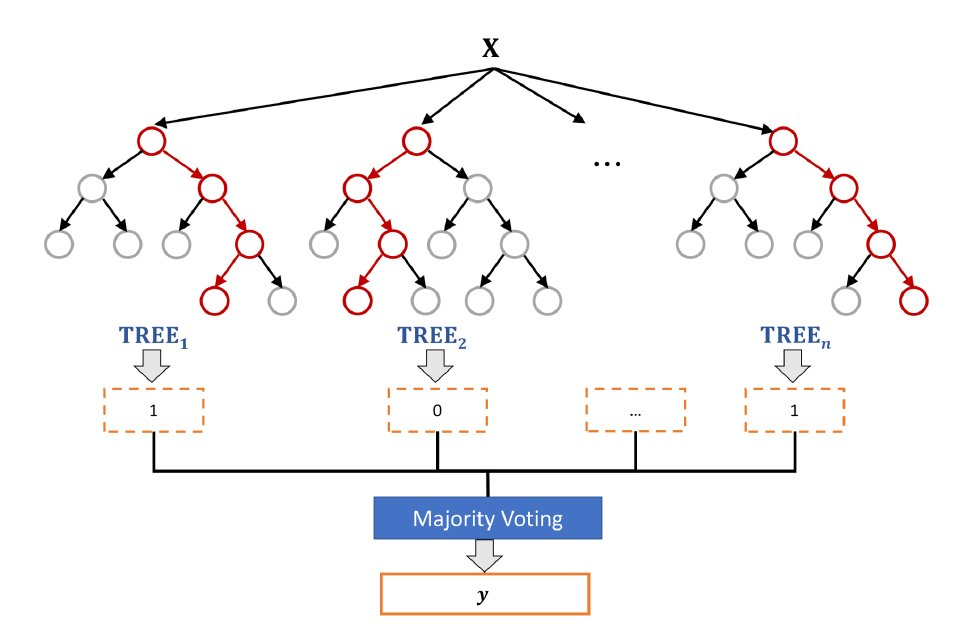

****
> - It is a supervised learning strategy that can be used for both classificaton and regression. 
> - It an ensemble method (collection of many decision tree). 

****

## ***Why I chose  Random Forest***: 

> - It works best with classification.
> - It do not need to pruning like Decision Tree
> - It has a lot of Decision Trees in order to generate the final output so it is more effective than Decision Tree.


<a id="5.3.1"></a>
## 5.3.1 Training model:
****

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialise the model
random_forest = RandomForestClassifier(random_state=44)

# Fit the model with train set
random_forest.fit(X_train,y_train)

## Use the "X_train" to predict the model outcome -> evaluate the outcome of model in train set.
y_train_predicted=random_forest.predict(X_train)

## Use the "X_test" to predict the model outcome -> evaluate the outcome of model.
y_test_predicted=random_forest.predict(X_test)

## Overfitting

In [ ]:
## Check if the model is overfitting or not?
print("Test F1 Score:" + str(f1_score(y_test, y_pred)))
print("Test Accuracy Score:" + str(accuracy_score (y_test, y_test_predicted)))
print("--------------------------------------------------------")
print("Train F1 Score:" + str(f1_score (y_train, y_pred_train)))
print("Train Accuracy Score:" + str(accuracy_score (y_train, y_train_predicted)))

### ------------> OBSERVATION
****
According to the result, there is an extreme overfitting.

<a id="5.3.2"></a>
## 5.3.2 Hyperparameter tuning:
****

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160]
max_depth = range(1,10)
criterions = ['gini', 'entropy']
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=44)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X_train,y_train)

In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

In [ ]:
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

In [ ]:
model = RandomForestClassifier(max_depth=9, n_estimators=160, random_state=44, criterion='gini')
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

### ------------> OBSERVATION
****
It is still overfit. I will try to manually tuning the parameters which are `max_depth`, `n_estimators`, `max_features`, `min_samples_split`, `min_samples_leaf`, `bootstrap`.

## Tuning max_depth: 
****

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True) # List of values for tuning
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in max_depths:
   decisionTree = RandomForestClassifier(max_depth=max_depth, n_estimators=160, random_state=44, criterion='gini')
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = accuracy_score (y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)
    
   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = accuracy_score (y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)

   print('The Training Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test Accuracy for max_depth {} is:'.format(max_depth), test_acc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train Accuracy')
line2, = plt.plot(max_depths, test_results, "r", label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

### ------------> OBSERVATION
****
Best accuracy for the max_depth is 2

## Tunning n_estimators:

In [ ]:
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results

for n_estimator in range(140,172):    
   decisionTree = RandomForestClassifier(max_depth=2, n_estimators=n_estimator, random_state=44, criterion='gini')
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = accuracy_score (y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)
    
   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = accuracy_score (y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)

   print('The Training Accuracy for n_estimator {} is:'.format(n_estimator), train_acc)
   print('The Test Accuracy for n_estimator {} is:'.format(n_estimator), test_acc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train Accuracy')
line2, = plt.plot(max_depths, test_results, "r", label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

### ------------> OBSERVATION
****
Best n_estimators is 140
max_depth=2

## Tunning max_feature:
***
For max_feature I just take from 1 to 7 features that I currently have

In [ ]:
for max_feature in range(1,8):
  model = RandomForestClassifier(max_depth=2, n_estimators=140, random_state=44, criterion='gini',max_features=max_feature)
  model.fit(X_train,y_train)
  print('The Training Accuracy for max_features {} is:'.format(max_feature), model.score(X_train,y_train))
  print('The Test Accuracy for max_features {} is:'.format(max_feature), model.score(X_test,y_test))
  print('')

### ------------> OBSERVATION
****
Best n_estimators is 140
max_depth = 2
max_features=5

## Tunning min_samples_leaf:

In [ ]:
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for min_samples_leaf in range(1,33):
   decisionTree = RandomForestClassifier(max_depth=2, n_estimators=140, random_state=44, criterion='gini',
                                         max_features=5, min_samples_leaf=min_samples_leaf
                                        )
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = accuracy_score (y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)
    
   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = accuracy_score (y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)

   print('The Training Accuracy for min_samples_leaf {} is:'.format(min_samples_leaf), train_acc)
   print('The Test Accuracy for min_samples_leaf {} is:'.format(min_samples_leaf), test_acc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train Accuracy')
line2, = plt.plot(max_depths, test_results, "r", label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

### ------------> OBSERVATION
****
- Best n_estimators is 2

- max_depth=2

- max_features = 3

- min_samples_leaf = 2

## Retrain

In [ ]:
# Initialise the model
random_forest = RandomForestClassifier(ccp_alpha=0.00899989, max_depth=2, n_estimators=140, random_state=44, criterion='gini',max_features=2,
                                      min_samples_leaf=2,  max_leaf_nodes=8
                                      )
# Fit the model with train set
random_forest.fit(X_train,y_train)

## Use the "X_train" to predict the model outcome -> evaluate the outcome of model in train set.
y_train_predicted=random_forest.predict(X_train)

## Use the "X_test" to predict the model outcome -> evaluate the outcome of model.
y_test_predicted=random_forest.predict(X_test)

In [ ]:
## Check if the model is overfitting or not?
print("Test F1 Score:" + str(f1_score(y_test, y_pred)))
print("Test Accuracy Score:" + str(accuracy_score (y_test, y_test_predicted)))
print("--------------------------------------------------------")
print("Train F1 Score:" + str(f1_score (y_train, y_pred_train)))
print("Train Accuracy Score:" + str(accuracy_score (y_train, y_train_predicted)))

In [ ]:
print(classification_report(y_test, y_test_predicted))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

<a id="5.2.3"></a>
## 5.2.3 Conclusion
****
- In order to valuate the Random Forest Model, I use some methods including the accuracy, AUC score, precision, recall and f1-score.
- Since the accuracy score only concentrates on the true and correct values, nevertheless, this is the medical problem so it also requires the wrong rate to be minimum as much as possible. Since then, the precision, recall and f1-score are good methods. 
- In this model

> - Accuracy: 0.80
> - AUC score: 0.76 (The area under the ROC curve (AUC) results were considered excellent for AUC values between 0.9-1, good for AUC values between 0.8-0.9, fair for AUC values between 0.7-0.8, poor for AUC values between 0.6-0.7 and failed for AUC values between 0.5-0.6.) [[6](#Link6)]
> - Precision classify the sepsis: 0.76
> - Recall classify the sepsis: 0.73
> - F1-score classify the sepsis: 0.74

<a id="6"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>6. Compare Models</strong></h1>

*****
<a id="6.1"></a>
## 6.1 Comparision Model
****

In [ ]:
clf_list = [
    (logreg, "Logistic"),
    (decision_tree, "Decision tree"),
    (random_forest, "Random forest"),
]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay


fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li> According to this plot, my Decision Tree model is the most effective model since it is nearly fit the calibrated line prefectly. So I will submit the result of Decision Tree.</li>
    <br>
    <li> From my own perspective, this dataset is small, so that it cannot work well with both of Logistic Regression, and Random Forest. Since the Logistic Regression require an amount of data to generate the line clearly. Moreover, the Rndom Forest is the combination of a multiple of Decision Tree, when it is a small data, then the combination is small so the accuracy is not high enough.</li>
</ul>
</div>

<a id="6.2"></a>
## 6.2 Save the best result
****

In [ ]:
patient_ID = test['ID']

output = pd.DataFrame()
output['ID'] = patient_ID
output['Sepsis'] = pd.Series(y_pred_decision_tree)
output = output.dropna(axis = 0, how ='any')

output.to_csv('Sepsis_prediction_result.csv', index=False)
print("Submission was successfully saved!")

<a id="7"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>7. Conclusion</strong></h1>

*****

In short, Sepsis has been a life-threatening condition for many paitent so that detecting the sepsis as early as possible is a vital mission of the scientist. After analysing and exploring the data set process, some intersting insights, one of those are the higher the statistic medical number is the higher chance the paitent will get sepsis.

After the cleaning process, EDA, and t-test, the result is that the higher the statistical medical is, the higher chance for the paitent to have sepsis. Because of that, the outliers were not removed. Moreover, after traning all three models the Decision Tree has the highest score and the recall score is the highest so it is chosen for this project. 

<a id="8"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>8. References</strong></h1>

*****

<a id="Link1"></a>
- [1] [What Are Platelets and Why Are They Important?](https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important#:~:text=A%20normal%20platelet%20count%20ranges,complete%20blood%20count%20(CBC).)

<a id="Link2"></a>
- [2] [What's a normal resting heart rate?](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979#:~:text=A%20normal%20resting%20heart%20rate%20for%20adults%20ranges%20from%2060,to%2040%20beats%20per%20minute.)

<a id="Link3"></a>
- [3] [What Is a Potassium Blood Test?](https://www.webmd.com/a-to-z-guides/potassium-blood-test)

<a id="Link3"></a>
- [3] [What Is a Potassium Blood Test?](https://www.webmd.com/a-to-z-guides/potassium-blood-test)

<a id="Link3"></a>
- [3] [What Is a Potassium Blood Test?](https://www.webmd.com/a-to-z-guides/potassium-blood-test)

<a id="Link3"></a>
- [3] [What Is a Potassium Blood Test?](https://www.webmd.com/a-to-z-guides/potassium-blood-test)

<a id="Link4"></a>
- [4] [Assessing Your Weight](https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range.)

<a id="Link5"></a>
- [5] [StandardScaler, MinMaxScaler and RobustScaler techniques – ML](https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/#:~:text=StandardScaler%20follows%20Standard%20Normal%20Distribution,negative%20values%20in%20the%20dataset.)

<a id="Link6"></a>
- [6] [The Relationship of Temporal Resolution to Diagnostic Performance for Dynamic Contrast Enhanced (DCE) MRI of the Breast](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2935260/)